In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [25]:
def gauss(x, a, m, s):
    return a*np.exp(-(x-m)**2/2/s**2)

In [26]:
def func(x, a1, m1, s1, a2, m2, s2):
    return gauss(x, a1, m1, s1) + gauss(x, a2, m2, s2)

In [27]:
params = [1.2, 0.6, 0.3, 0.8, -0.5, 0.5]
X = np.linspace(-3, 3, 600)
Y = [func(x ,*params) + np.random.randn()*0.05 for x in X]

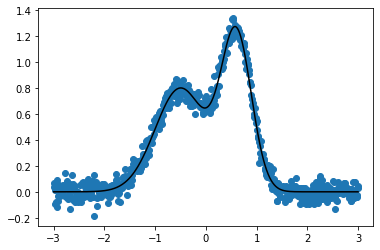

In [28]:
plt.scatter(X, Y)
plt.plot(X, [func(x ,*params) for x in X], color='k')
plt.show()

In [23]:
from scipy.optimize import curve_fit

In [29]:
popt, pcov = curve_fit(func, X, Y)

In [31]:
popt

array([-0.57695304,  1.48449416,  0.37400409,  1.02718341,  0.37474612,
       -0.97769097])

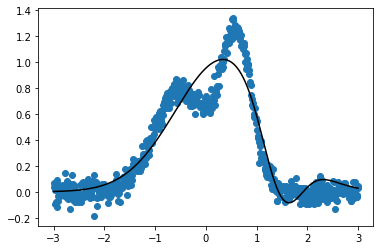

In [30]:
plt.scatter(X, Y)
plt.plot(X, [func(x ,*popt) for x in X], color='k')
plt.show()

In [44]:
np.array([0.1, 1, 10, 100, 1000]) * np.random.randn(5)

array([ 1.23873905e-01,  1.67482334e+00,  7.02747688e+00, -4.53032774e+01,
       -1.05007148e+03])

In [129]:
class MH(object):
    @staticmethod
    def prior_prob_unif(params):
        return 0
    
    def __init__(self, func, X, Y, init, eps, prior_prob):
        self.func = func
        self.X = X
        self.Y = Y
        self.eps = np.array(eps)
        self.prior_prob = prior_prob
        
        self.pre_params = init
        self.samples = [self.pre_params]
        self.pre_ll = self.log_prob(init)
        self.ll_samples = [self.pre_ll]
        
    def log_prob(self, params):
        p = self.prior_prob(params)
        if p==0: return np.NINF
        return self.log_likelihood(params) + np.log(p)
        
    def log_likelihood(self, params):
        return (-(Y - self.func(self.X, *params[:-1]))**2).sum() / 2 / params[-1]**2 - np.log(2*np.pi*params[-1]**2) * X.size 
    
    def sampling(self, sample_size):
        for _ in range(sample_size):
            new_params = [p+e for p,e in zip(self.pre_params, self.eps*np.random.randn(self.eps.size))]
            new_ll = self.log_prob(new_params)
            if new_ll>self.pre_ll or np.random.rand() < np.exp(- new_ll + self.pre_ll):
                self.pre_params = new_params
                self.pre_ll = new_ll
            self.samples += [self.pre_params]
            self.ll_samples += [self.pre_ll]

In [123]:
def restriction(params):
    a1, m1, s1, a2, m2, s2, s_err = params
    return (0<a1 and 0<s1 and 0<a2 and 0<s2 and 0<s_err and m2<m1)

In [108]:
model = MH(func, X, Y, [1.2+0.1, 0.6+0.1, 0.3+0.1, 0.8+0.1, -0.5-0.1, 0.5+0.1, 0.01+0.001], [1e-3]*7)

In [109]:
model.sampling(10**6)

/tmp/ipykernel_5443/1205778134.py:25: RuntimeWarning: overflow encountered in exp
  if new_ll>self.pre_ll or np.random.rand() < np.exp(- new_ll + self.pre_ll):


In [110]:
samples = np.array(model.samples)

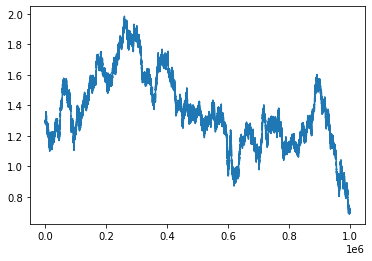

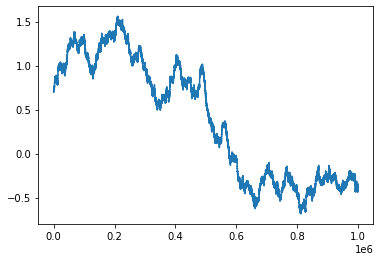

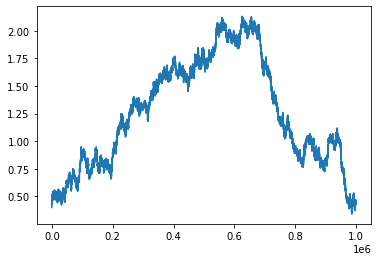

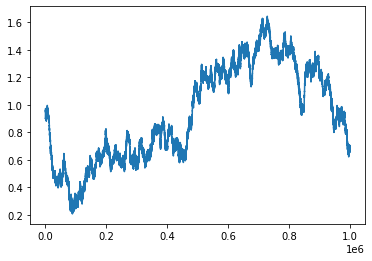

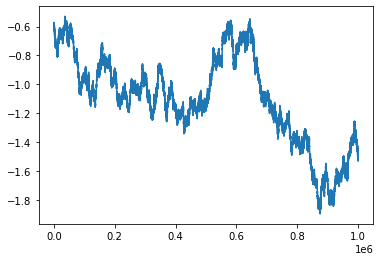

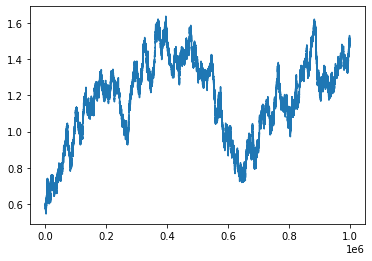

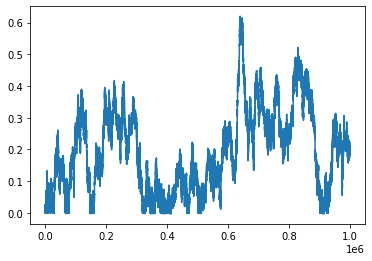

In [111]:
for i in range(7):
    plt.plot(samples[:, i])
    plt.show()

(-10000.0, 0.0)

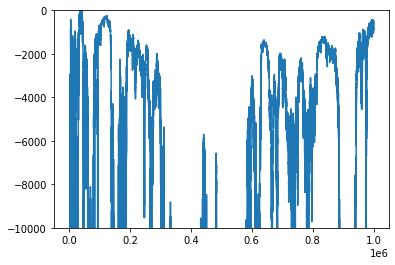

In [112]:
plt.plot(model.ll_samples)
plt.ylim(-1e4, 0)

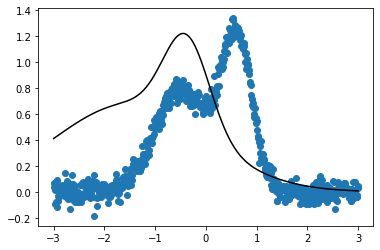

In [114]:
plt.scatter(X, Y)
plt.plot(X, [func(x ,*samples[-10**3:, :].mean(axis=0)[:-1]) for x in X], color='k')
plt.show()

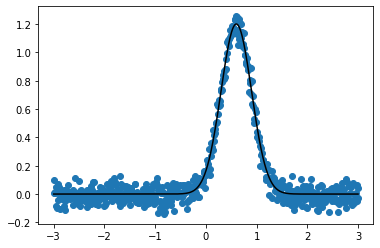

In [117]:
params = [1.2, 0.6, 0.3]
X = np.linspace(-3, 3, 600)
Y = [gauss(x ,*params) + np.random.randn()*0.05 for x in X]

plt.scatter(X, Y)
plt.plot(X, [gauss(x ,*params) for x in X], color='k')
plt.show()

In [172]:
class MH(object):
    @staticmethod
    def prior_prob_unif(params):
        return 0
    
    def __init__(self, func, X, Y, init, eps, prior_prob):
        self.func = func
        self.X = X
        self.Y = Y
        self.eps = np.array(eps)
        self.prior_prob = prior_prob
        
        self.pre_params = init
        self.samples = [self.pre_params]
        self.pre_ll = self.log_prob(init)
        self.ll_samples = [self.pre_ll]
        
    def log_prob(self, params):
        p = self.prior_prob(params)
        if p==0: return np.NINF
        return self.log_likelihood(params) + np.log(p)
        
    def log_likelihood(self, params):
        return -((Y - self.func(self.X, *params))**2).sum() / 2 / 0.01**2# - np.log(2*np.pi*params[-1]**2) * X.size 
    
    def sampling(self, sample_size):
        for _ in range(sample_size):
            new_params = [p+e for p,e in zip(self.pre_params, self.eps*np.random.randn(self.eps.size))]
            new_ll = self.log_prob(new_params)
            if new_ll>self.pre_ll or np.random.rand() < np.exp(new_ll - self.pre_ll):
                self.pre_params = new_params
                self.pre_ll = new_ll
            self.samples += [self.pre_params]
            self.ll_samples += [self.pre_ll]

In [173]:
def restriction(params):
    a1, m1, s1 = params
    return (0<a1 and 0<s1)
def prior_prob(params):
    if restriction(params):
        return 1
    else:
        return 0

In [174]:
model = MH(gauss, X, Y, [1.2+0.1, 0.6+0.1, 0.3+0.1], [1e-3]*3, prior_prob)

In [175]:
model.sampling(10**5)

In [176]:
samples = np.array(model.samples)
samples.shape

(100001, 3)

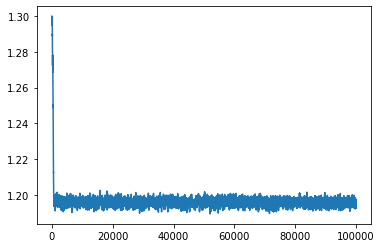

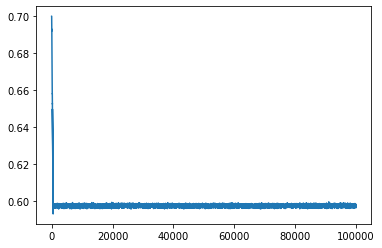

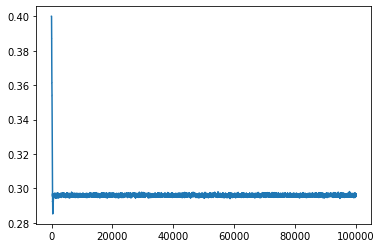

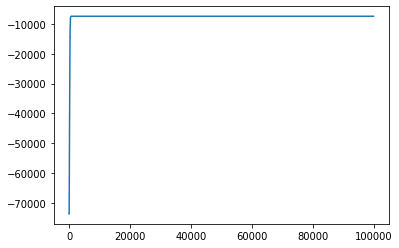

In [177]:
for i in range(samples.shape[1]):
    plt.plot(samples[:, i])
    plt.show()
plt.plot(model.ll_samples)
plt.show()

In [178]:
len(model.ll_samples)

100001

In [179]:
model.prior_prob

<function __main__.prior_prob(params)>

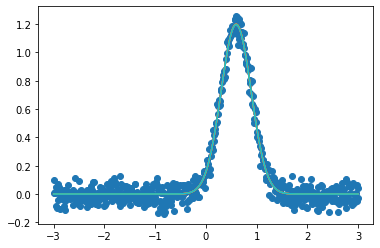

In [180]:
plt.scatter(X, Y)
for i in [-10**3+10**2*i for i in range(10)]:
    plt.plot(X, [model.func(x ,*samples[i, :]) for x in X])
plt.show()

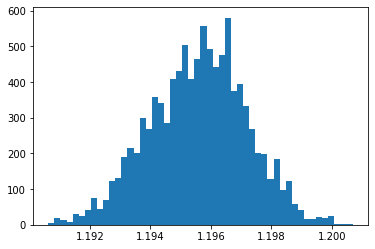

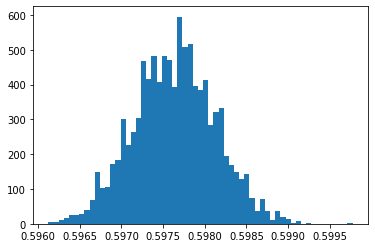

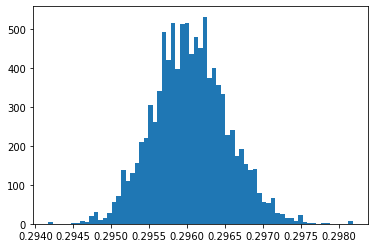

In [181]:
for i in range(samples.shape[1]):
    plt.hist(samples[-10**4:, i], bins='auto')
    plt.show()

In [182]:
params

[1.2, 0.6, 0.3]

In [183]:
class MH(object):
    @staticmethod
    def prior_prob_unif(params):
        return 0
    
    def __init__(self, func, X, Y, init, eps, prior_prob):
        self.func = func
        self.X = X
        self.Y = Y
        self.eps = np.array(eps)
        self.prior_prob = prior_prob
        
        self.pre_params = init
        self.samples = [self.pre_params]
        self.pre_ll = self.log_prob(init)
        self.ll_samples = [self.pre_ll]
        
    def log_prob(self, params):
        p = self.prior_prob(params)
        if p==0: return np.NINF
        return self.log_likelihood(params) + np.log(p)
        
    def log_likelihood(self, params):
        return -((Y - self.func(self.X, *params[:-1]))**2).sum() / 2 / params[-1]**2 - np.log(2*np.pi*params[-1]**2) * X.size 
    
    def sampling(self, sample_size):
        for _ in range(sample_size):
            new_params = [p+e for p,e in zip(self.pre_params, self.eps*np.random.randn(self.eps.size))]
            new_ll = self.log_prob(new_params)
            if new_ll>self.pre_ll or np.random.rand() < np.exp(new_ll - self.pre_ll):
                self.pre_params = new_params
                self.pre_ll = new_ll
            self.samples += [self.pre_params]
            self.ll_samples += [self.pre_ll]

In [184]:
def restriction(params):
    a1, m1, s1, s_err = params
    return (0<a1 and 0<s1 and 0<s_err)
def prior_prob(params):
    if restriction(params):
        return 1
    else:
        return 0

In [186]:
model = MH(gauss, X, Y, [1.2+0.1, 0.6+0.1, 0.3+0.1, 0.01+0.01], [1e-3]*4, prior_prob)

model.sampling(10**5)
samples = np.array(model.samples)

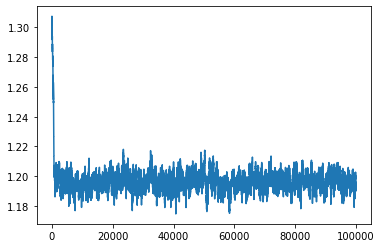

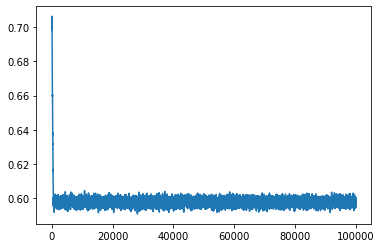

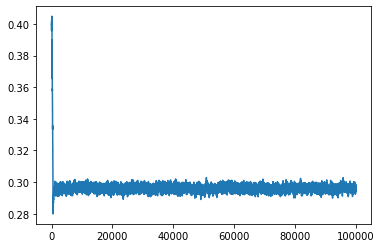

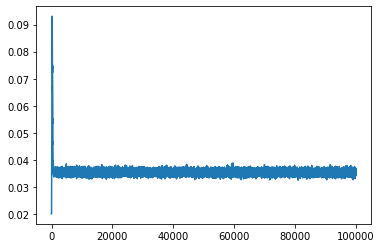

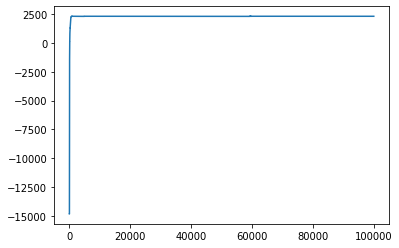

In [187]:
for i in range(samples.shape[1]):
    plt.plot(samples[:, i])
    plt.show()
plt.plot(model.ll_samples)
plt.show()

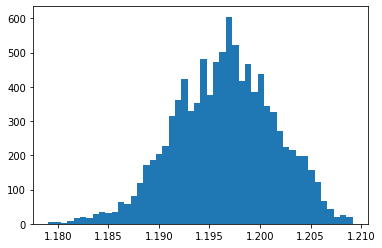

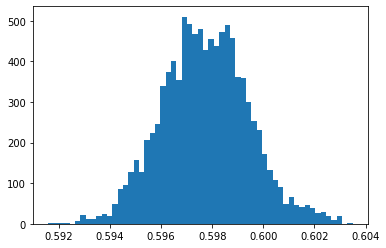

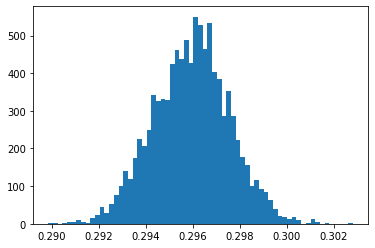

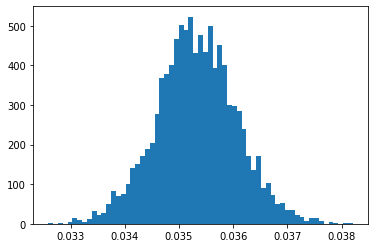

In [193]:
for i in range(samples.shape[1]):
    plt.hist(samples[-10**4:, i], bins='auto')
    plt.show()

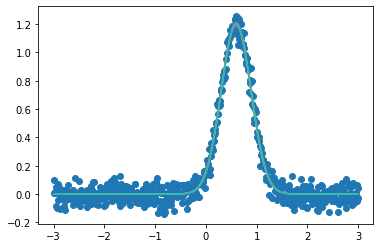

In [192]:
plt.scatter(X, Y)
for i in np.random.choice(range(10**5-10**4, 10**5), 10):
    plt.plot(X, [model.func(x ,*samples[i, :-1]) for x in X])
plt.show()